# Understand server utilization

In [1]:
from arcgis.gis import *
from getpass import getpass

In [2]:
password = getpass()
gis = GIS('https://sabu.esri.com/portal/','admin',password)

hosting_server = gis.servers[0]
hosting_server.connection.baseurl

········


'https://sabu.esri.com:6443/arcgis/rest/services'

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
from datetime import datetime

In [4]:
usage = hosting_server.usage

In [5]:
usage.url

'https://sabu.esri.com:6443/arcgis/admin/usagereports'

In [6]:
server_use_reports = usage.reports
server_use_reports

[UsageReport([('reportname', 'Max response times for the last 7 days'),
              ('metadata',
               {'managerReport': True,
                'styles': {'services/': {'color': '#382DF5'}},
                'temp': False,
                'title': 'Max response times for the last 7 days'}),
              ('queries',
               [{'metrics': ['RequestMaxResponseTime'],
                 'resourceURIs': ['services/']}]),
              ('since', 'LAST_WEEK')]),
 UsageReport([('reportname', 'Timed-out requests for the last 7 days'),
              ('metadata',
               {'managerReport': True,
                'styles': {'services/': {'color': '#2F9400'}},
                'temp': False,
                'title': 'Timed-out requests for the last 7 days'}),
              ('queries',
               [{'metrics': ['RequestsTimedOut'],
                 'resourceURIs': ['services/']}]),
              ('since', 'LAST_WEEK')]),
 UsageReport([('reportname', 'Total requests for the last 

In [7]:
report_total_req = server_use_reports[-1].query()
report_total_req

{'report': {'metadata': '{"temp":false,"title":"Total requests for the last 7 days","managerReport":true,"styles":{"services/":{"color":"#D900D9"}}}',
  'report-data': [[{'data': [0,
      0,
      0,
      0,
      0,
      0,
      0,
      0,
      0,
      0,
      0,
      0,
      149,
      260,
      43,
      0,
      0,
      0,
      3,
      6,
      45,
      0,
      0,
      0,
      0,
      0,
      0,
      0,
      0,
      0,
      0,
      0,
      0,
      0,
      0,
      30,
      112,
      529,
      43,
      29,
      0,
      0],
     'metric-type': 'RequestCount',
     'resourceURI': 'services/'}]],
  'reportname': 'Total requests for the last 7 days',
  'time-slices': [1488052800000,
   1488067200000,
   1488081600000,
   1488096000000,
   1488110400000,
   1488124800000,
   1488139200000,
   1488153600000,
   1488168000000,
   1488182400000,
   1488196800000,
   1488211200000,
   1488225600000,
   1488240000000,
   1488254400000,
   1488268800000,
   14

In [8]:
data_y = report_total_req['report']['report-data'][0][0]['data']
data_x = [datetime.fromtimestamp(d//1000) for d in report_total_req['report']['time-slices']]

(array([ 736386.,  736387.,  736388.,  736389.,  736390.,  736391.,  736392.]),
 <a list of 7 Text xticklabel objects>)

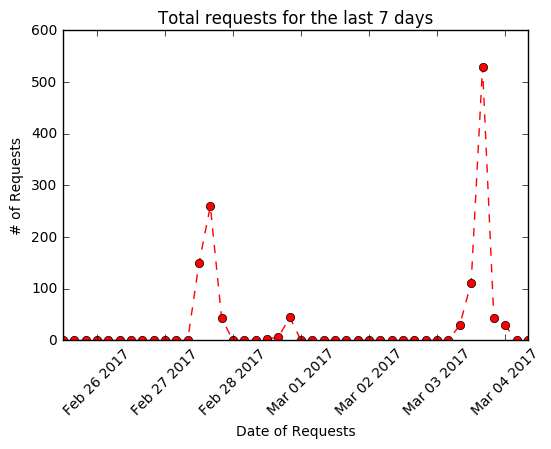

In [9]:
plt.plot(data_x,data_y, marker='o',linestyle='--', color='r', label='Square')
plt.xlabel('Date of Requests')
plt.ylabel('# of Requests')
plt.title("Total requests for the last 7 days")
plt.xticks(rotation = 45)